+ 의사결정나무 : 의사결정규칙을 나무 구조로 나타내어 전체 자료를 몇 개의 소집단으로 분류하거나 예측을 수행하는 분석 방법
  + 하위노드 : 노드(집단) 내에서는 동질성이, 집단 간에는 이질성이 가장 커지도록 선택
  + 뿌리노드, 부모노드, 자식노드, 최종노드
  + 가지분할, 가지치기
  + 분류나무 : 목표변수가 이산형
    + 카이제곱통계량의 p-값, 지니지수, 엔트로피지수
    : 값이 작을수록 자식노드 간 이질성이 큼
    
  + 회귀나무 : 목표변수가 연속형
    + F-통계량의 p-값 : 값이 클수록 자식노드 간이 이질적이므로 이 값이 커지는 방향으로 가지분할 수행
    + 분산의 감소량 : 이 값이 최대화 되는 방향으로 가지분할 수행
  
+ 장점
  1) 구조가 단순하여 해석이 용이
  2) 유용한 입력변수의 파악과 예측변수 간의 상호작용 및 비선형성을 고려하여 분석이 수행
  3) 선형성, 정규성, 등분산성 등의 수학적 가정이 불필요한 비모수적 모형
+ 단점
  1) 분류 기준값의 경계선 근방의 자룟값에 대해서는 오차가 클 수 있음(비연속성)
  2) 각 예측변수의 효과를 파악하기 어려움
  3) 새로운 자료에 대한 예측이 불안정할 수 있음

### 예제 1.

In [1]:
install.packages("rpart")
library(rpart)
c = rpart(Species ~., data = iris)
c

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *

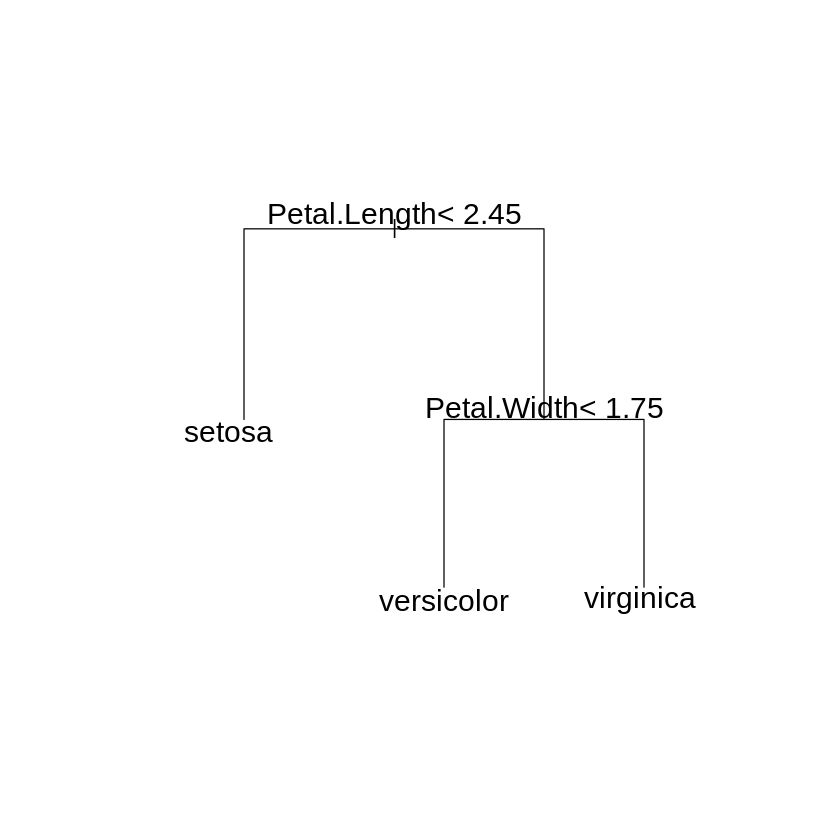

In [2]:
plot(c, compress = T, margin = 0.3)
text(c, cex = 1.5)

In [3]:
head(predict(c, newdata = iris, type = "class"))
tail(predict(c, newdata = iris, type = "class"))

1      2      3      4      5      6 
setosa setosa setosa setosa setosa setosa 
Levels: setosa versicolor virginica

145       146       147       148       149       150 
virginica virginica virginica virginica virginica virginica 
Levels: setosa versicolor virginica

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



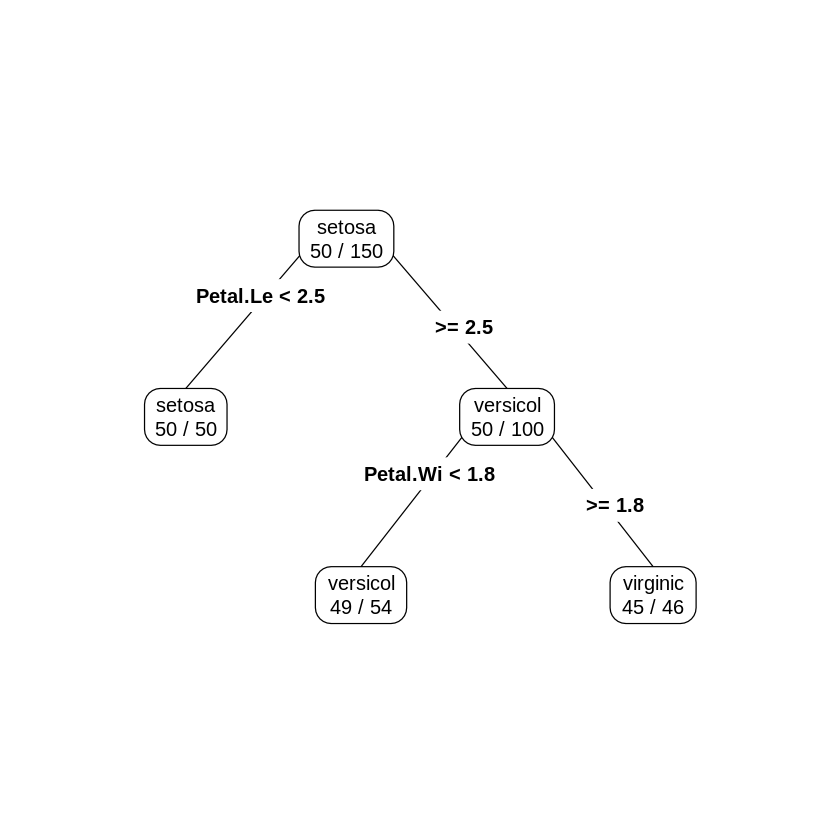

In [4]:
install.packages("rpart.plot")
library(rpart.plot)
prp(c, type = 4, extra = 2)

In [5]:
ls(c)

[1] "call"                "control"             "cptable"            
 [4] "frame"               "functions"           "method"             
 [7] "numresp"             "ordered"             "parms"              
[10] "splits"              "terms"               "variable.importance"
[13] "where"               "y"

In [6]:
c$cptable  # 트리의 크기에 따른 비용-복잡도 모수, 교차타당성오차 제공

,CP,nsplit,rel error,xerror,xstd
1,0.50,0,1.00,1.18,0.05017303
2,0.44,1,0.50,0.71,0.06115009
3,0.01,2,0.06,0.08,0.02751969


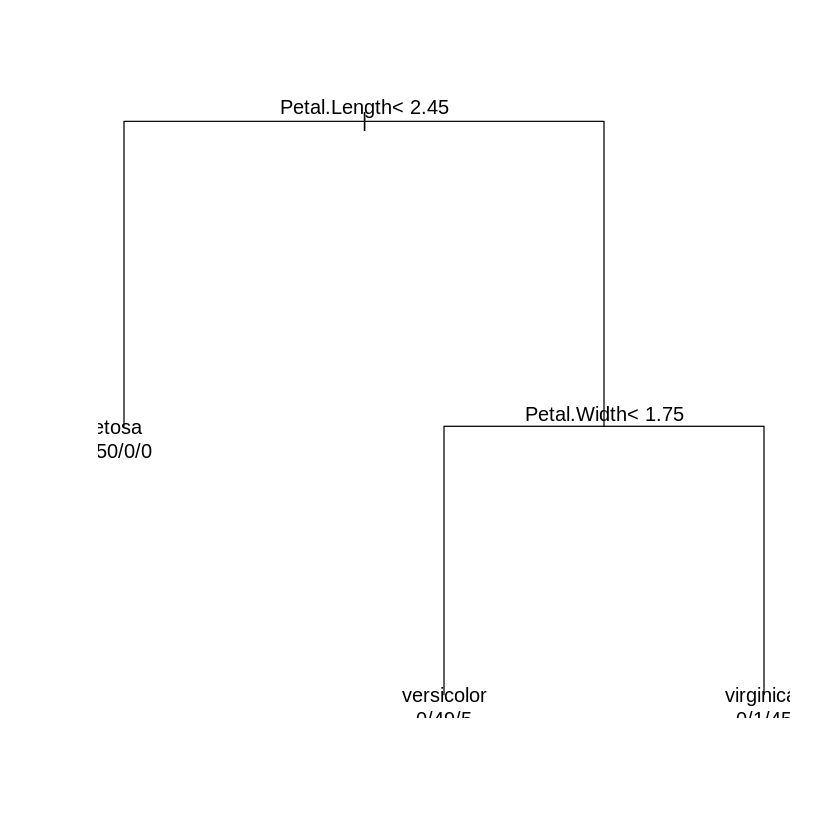

In [7]:
opt = which.min(c$cptable[,"xerror"])
cp = c$cptable[opt, "CP"]
prune.c = prune(c, cp = cp)
plot(prune.c)
text(prune.c, use.n = T)

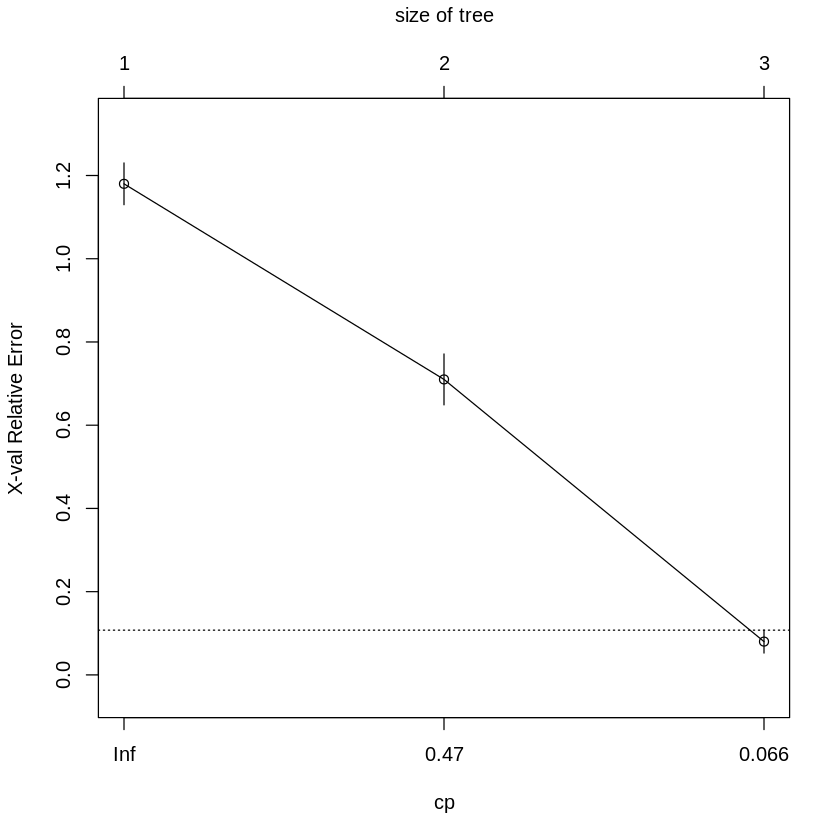

In [8]:
plotcp(c)

### 예제 2.

In [9]:
install.packages("party")
library(party)
data(stagec)
str(stagec)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’


Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



'data.frame':	146 obs. of  8 variables:
 $ pgtime : num  6.1 9.4 5.2 3.2 1.9 4.8 5.8 7.3 3.7 15.9 ...
 $ pgstat : int  0 0 1 1 1 0 0 0 1 0 ...
 $ age    : int  64 62 59 62 64 69 75 71 73 64 ...
 $ eet    : int  2 1 2 2 2 1 2 2 2 2 ...
 $ g2     : num  10.26 NA 9.99 3.57 22.56 ...
 $ grade  : int  2 3 3 2 4 3 2 3 3 3 ...
 $ gleason: int  4 8 7 4 8 7 NA 7 6 7 ...
 $ ploidy : Factor w/ 3 levels "diploid","tetraploid",..: 1 3 1 1 2 1 2 3 1 2 ...


In [10]:
stagec1 = subset(stagec, !is.na(g2))
stagec2 = subset(stagec1, !is.na(gleason))
stagec3 = subset(stagec2, !is.na(eet))
str(stagec3)

'data.frame':	134 obs. of  8 variables:
 $ pgtime : num  6.1 5.2 3.2 1.9 4.8 3.7 15.9 6.3 2.9 1.5 ...
 $ pgstat : int  0 1 1 1 0 1 0 0 1 1 ...
 $ age    : int  64 59 62 64 69 73 64 65 58 70 ...
 $ eet    : int  2 2 2 2 1 2 2 2 2 2 ...
 $ g2     : num  10.26 9.99 3.57 22.56 6.14 ...
 $ grade  : int  2 3 2 4 3 3 3 3 4 3 ...
 $ gleason: int  4 7 4 8 7 6 7 7 8 8 ...
 $ ploidy : Factor w/ 3 levels "diploid","tetraploid",..: 1 1 1 2 1 1 2 2 2 1 ...


In [11]:
set.seed(1234)
ind = sample(2, nrow(stagec3), replace = TRUE, prob = c(0.7, 0.3))
ind

[1] 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 1
 [38] 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 2 2 1 1 1 1 2 1 1 1 1 1 2 1 2
 [75] 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2
[112] 1 2 1 1 2 2 1 1 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1

In [12]:
trainData = stagec3[ind == 1,]  # n = 102개
testData = stagec3[ind == 2,]  # n = 32개

tree = ctree(ploidy ~ ., data = trainData)
tree


	 Conditional inference tree with 3 terminal nodes

Response:  ploidy 
Inputs:  pgtime, pgstat, age, eet, g2, grade, gleason 
Number of observations:  102 

1) g2 <= 13.01; criterion = 1, statistic = 49.684
  2) pgstat <= 0; criterion = 0.958, statistic = 7.5
    3)*  weights = 36 
  2) pgstat > 0
    4)*  weights = 15 
1) g2 > 13.01
  5)*  weights = 51 

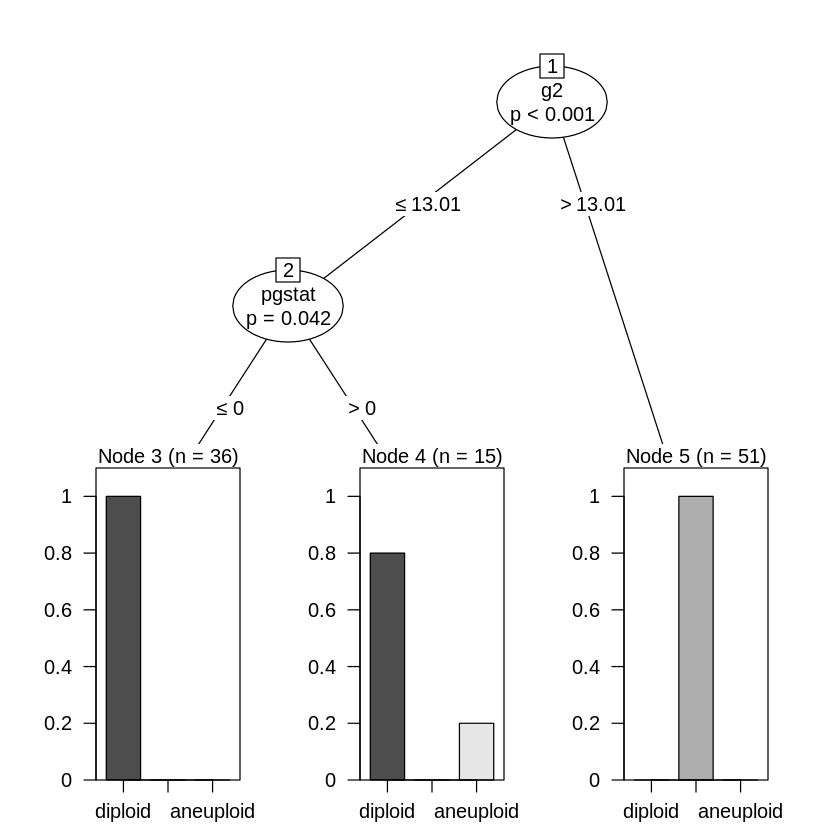

In [13]:
plot(tree)

In [14]:
testPred = predict(tree, newdata = testData)
table(testPred, testData$ploidy)  # testData 32개

            
testPred     diploid tetraploid aneuploid
  diploid         17          0         1
  tetraploid       0         13         1
  aneuploid        0          0         0

### 예제 3.

In [15]:
airq = subset(airquality, !is.na(Ozone))
head(airq)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
6,28,NA,14.9,66,5,6
7,23,299,8.6,65,5,7


In [16]:
airct = ctree(Ozone ~ ., data = airq)
airct


	 Conditional inference tree with 5 terminal nodes

Response:  Ozone 
Inputs:  Solar.R, Wind, Temp, Month, Day 
Number of observations:  116 

1) Temp <= 82; criterion = 1, statistic = 56.086
  2) Wind <= 6.9; criterion = 0.998, statistic = 12.969
    3)*  weights = 10 
  2) Wind > 6.9
    4) Temp <= 77; criterion = 0.997, statistic = 11.599
      5)*  weights = 48 
    4) Temp > 77
      6)*  weights = 21 
1) Temp > 82
  7) Wind <= 10.3; criterion = 0.997, statistic = 11.712
    8)*  weights = 30 
  7) Wind > 10.3
    9)*  weights = 7 

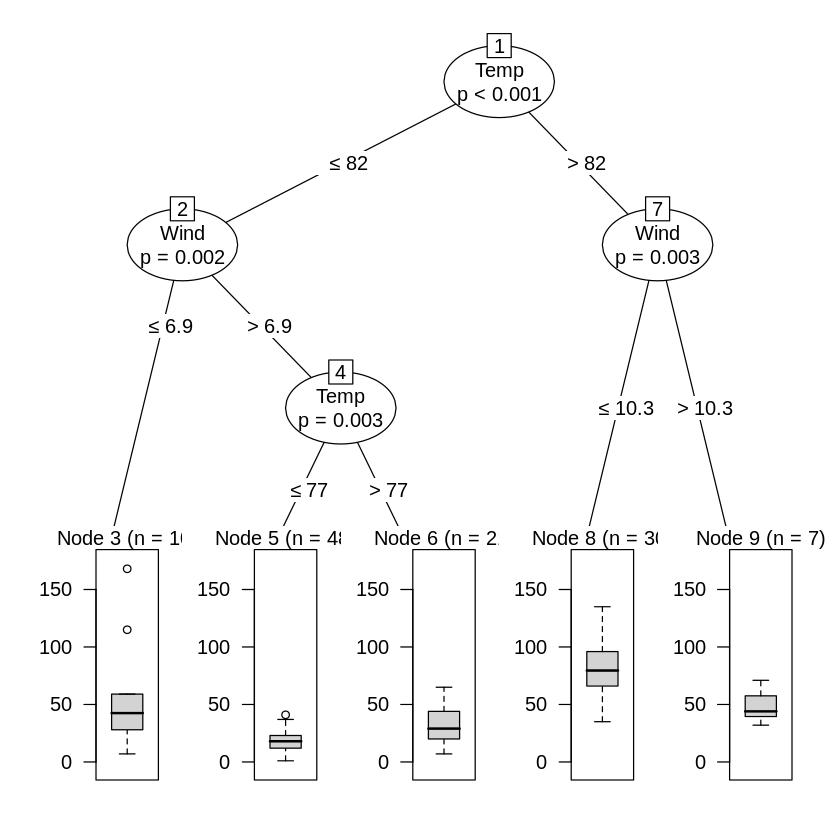

In [17]:
plot(airct)

In [18]:
head(predict(airct, data = airq))

Ozone
18.47917
18.47917
18.47917
18.47917
18.47917
18.47917


In [19]:
predict(airct, data = airq, type = "node")

[1] 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 3 5 6 9 9 6 5 5 5 5 5 8 8
 [38] 6 8 9 8 8 8 8 5 6 6 3 6 8 8 9 3 8 8 6 9 8 8 8 6 3 6 6 8 8 8 8 8 8 9 6 6 5
 [75] 3 5 6 6 5 5 6 3 8 8 8 8 8 8 8 8 8 8 9 6 6 5 5 6 5 3 5 5 3 5 5 5 6 5 5 6 5
[112] 5 3 5 5 5

In [20]:
mean((airq$Ozone - predict(airct))^2)

[1] 403.6668